<a href="https://colab.research.google.com/github/Nantha-16/Data-Analytics-projects/blob/main/EDA_using_python_on_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 2.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-06-17 15:08:29--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  31.2MB/s    in 0.7s    

2025-06-17 15:08:30 (31.2 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
df1 = pd.read_excel("Online Retail.xlsx", dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df1.shape

(541909, 8)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


Data cleaning.....

In [8]:
df1.isna().sum().reset_index()

,index,0
0,InvoiceNo,0
1,StockCode,0
2,Description,1454
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,135080
7,Country,0


In [9]:
df1[df1.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [10]:
df1[df1.StockCode=='22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [11]:
df1[df1.StockCode=='22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [12]:
most_freq_des = df1[['StockCode','Description']].value_counts().reset_index()
most_freq_des

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [13]:
most_freq_des[most_freq_des.StockCode=='85123A']

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
3300,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9
4620,85123A,wrongly marked carton 22804,1
4658,85123A,?,1


In [14]:
most_freq_des = most_freq_des.groupby('StockCode').head(1)
most_freq_des.head()

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


In [15]:
most_freq_des.columns = ["StockCode", "freq_des", "count"]
most_freq_des.head()

,StockCode,freq_des,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


In [16]:
df2 = df1.merge(most_freq_des, on = 'StockCode', how = 'left')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_des,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [17]:
df2['Description'] = df2['freq_des']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_des,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [18]:
df2.isna().sum()


,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_des,112
count,112


In [19]:
df2.dropna(subset='Description', inplace=True)
df2.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_des,0
count,0


In [20]:
df2.drop(columns= ['freq_des', 'count'], inplace= True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [22]:
df3 = df2[(df2.Quantity >0) & (df2.UnitPrice > 0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [23]:
df3.Quantity.quantile(0.9999)

np.float64(1439.8763999990188)

In [24]:
df3[df3.Quantity>1500].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom


Required columns for more insights......

In [25]:
df4 = df3.copy()
df4['TotalSales'] = df4.Quantity * df4.UnitPrice
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [26]:
df4['month'] = df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,month
118949,546502,22993,SET OF 4 PANTRY JELLY MOULDS,1,2011-03-14 11:46:00,1.25,16005.0,United Kingdom,1.25,3
307268,563909,22630,DOLLY GIRL LUNCH BOX,1,2011-08-21 12:36:00,1.95,15701.0,United Kingdom,1.95,8
417658,572668,20727,LUNCH BAG BLACK SKULL.,2,2011-10-25 13:07:00,1.65,18045.0,United Kingdom,3.30,10
343907,566976,23380,PACK OF 12 VINTAGE DOILY TISSUES,24,2011-09-16 09:27:00,0.39,15382.0,United Kingdom,9.36,9
431365,573588,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-10-31 15:01:00,4.95,12588.0,Finland,14.85,10


###### Visualization and EDA...........

##### Monthly Total Sales Trend

In [27]:
monthly_sales = df4.groupby('month')['TotalSales'].sum()
monthly_sales

,TotalSales
month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


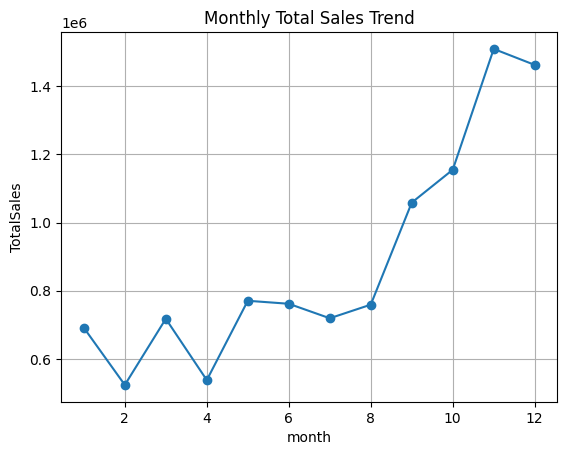

In [28]:
monthly_sales.plot(kind='line', title='Monthly Total Sales Trend', marker='o')
plt.xlabel('month')
plt.ylabel('TotalSales')
plt.grid(True)
plt.show()

Insights

Total sales started rising up in August having a peek in November. This is likely due to the holiday season at the end of the year

In [29]:
top_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head()
top_countries

,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


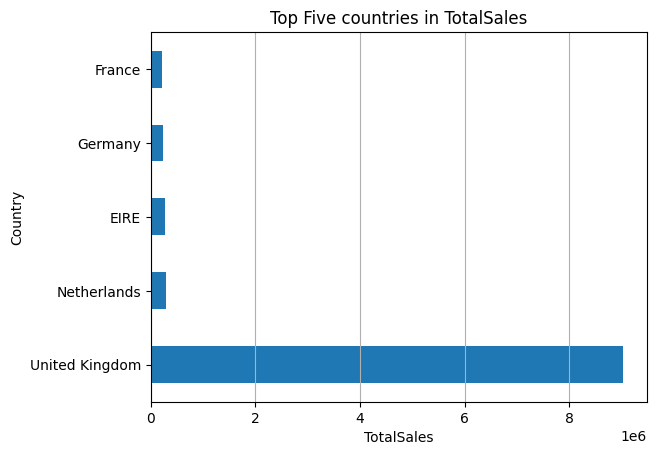

In [30]:
top_countries.plot(kind='barh', title='Top Five countries in TotalSales')
plt.xlabel('TotalSales')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

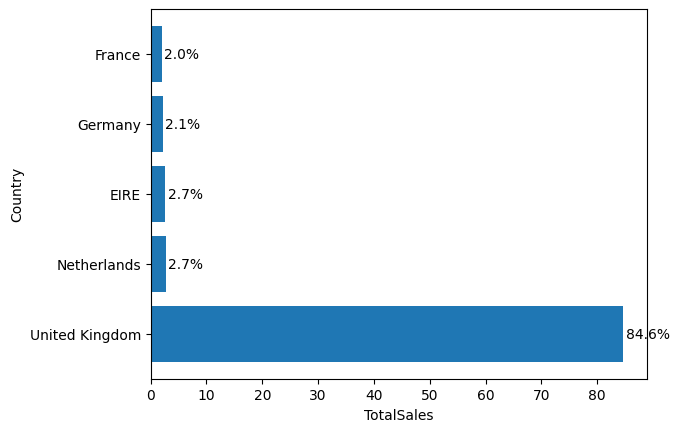

In [31]:
country_wise_sales = df4.groupby('Country')['TotalSales'].sum()
total_sales = country_wise_sales.sum()
top_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentage_contribution = (top_countries/total_sales) * 100
bars = plt.barh(top_countries.index, percentage_contribution)
plt.xlabel('TotalSales')
plt.ylabel('Country')
for bars, percentage_contribution in zip(bars, percentage_contribution):
    plt.text(bars.get_width() + 0.5, bars.get_y() + bars.get_height()/2, f'{percentage_contribution:.1f}%', va='center')
plt.show()

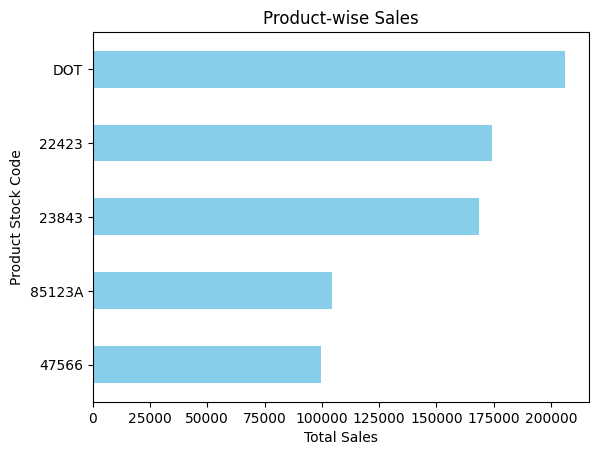

In [32]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()  # To show the highest sales at the top
plt.show()

In [33]:
df4[df4.StockCode=="DOT"].Description.iloc[0]

'DOTCOM POSTAGE'

In [34]:

for stock_code in top_5_products.index:
    description = df4[df4.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


RFM Analysis (Recency, Frequency, Monetary).....

In [35]:
df4['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [36]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [37]:

rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460
std,100.014169,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


In [38]:

# Segment Customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

In [39]:
rfm.sample(5)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
14912.0,17,27,867.85,4,2,3,9
15325.0,104,49,162.29,2,3,1,6
12498.0,21,23,403.70,3,2,2,7
12713.0,1,38,848.55,4,2,3,9
13730.0,136,43,752.60,2,3,3,8


In [40]:
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18198.0,4,159,5425.56,4,4,4,12
18210.0,2,134,2621.38,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
18283.0,4,756,2094.88,4,4,4,12
16983.0,13,148,1931.25,4,4,4,12
...,...,...,...,...,...,...,...
12402.0,323,11,225.60,1,1,1,3
18185.0,249,17,304.25,1,1,1,3
18190.0,192,15,284.46,1,1,1,3


Customer Churn Analysis......

In [41]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [42]:
customer_last_purchase = df4.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [43]:

type(customer_last_purchase)

pandas.core.series.Series

In [44]:
current_date

Timestamp('2011-12-10 12:50:00')

In [45]:

customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [46]:
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customers: 1449


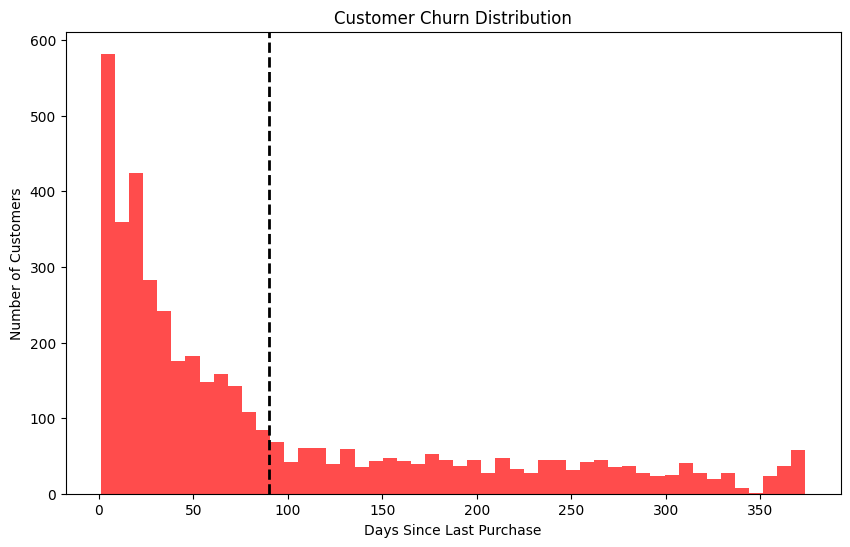

In [47]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()